In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

df = pd.read_csv('movie_metadata.csv')
i = 0
notUS = []
for i in range(0,len(df)):
    if (df.iloc[i]['country']!= 'USA'):
        notUS.append(i)
        
df_US = df.drop(df.index[notUS])
df_drop = df_US.dropna()

In [4]:
X = df_drop.iloc[:, [2, 3, 4, 5, 7, 8, 12, 13, 18, 22, 24, 25]]
y = df_drop.iloc[:, 8]

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(5,'Score'))

                       Specs         Score
5                      gross  2.721565e+11
9                     budget  1.403576e+11
6            num_voted_users  6.813601e+08
4     actor_1_facebook_likes  1.011694e+08
7  cast_total_facebook_likes  1.009344e+08


Text(0.5, 1.0, 'Movie Duration vs Revenue')

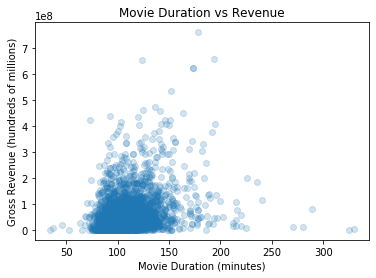

In [15]:
#DURATION

plt.scatter(df_US.duration, df_US.gross, alpha = .2)
plt.xlabel('Movie Duration (minutes)')
plt.ylabel('Gross Revenue (hundreds of millions)')
plt.title('Movie Duration vs Revenue')
#Duration does not seem to be a good feature

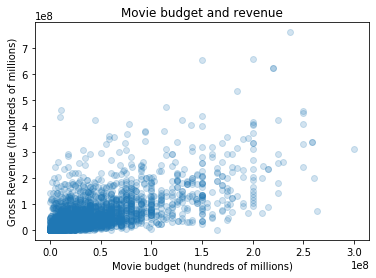

In [12]:
plt.scatter(df_drop.budget,df_drop.gross, alpha = .2)
plt.xlabel('Movie budget (hundreds of millions)')
plt.ylabel('Gross Revenue (hundreds of millions)')
plt.title('Movie budget vs Revenue')
plt.show()

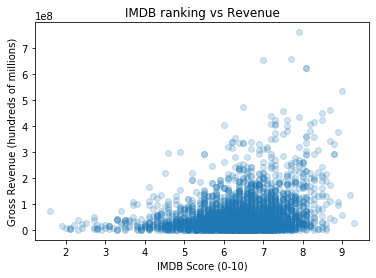

In [18]:
plt.scatter(df_drop.imdb_score,df_drop.gross, alpha = .2)
plt.xlabel('IMDB Score (0-10)')
plt.ylabel('Gross Revenue (hundreds of millions)')
plt.title('IMDB ranking vs Revenue')
plt.show()

(0, 500000000.0)

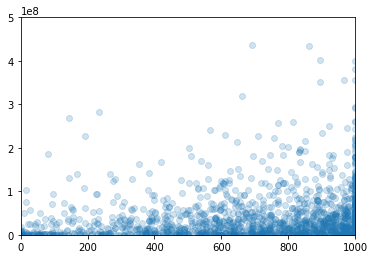

In [5]:
#ACTOR 1 LIKES

plt.scatter(df_US.actor_1_facebook_likes, df_US.gross, alpha = .2)
plt.xlim(0, 1000)
plt.ylim(0, 5e8)
#From 0-1000, the likes are measured down to a single like
#But from 1000 likes onwards the likes are measured in 1000 like intervals so I first made a scatterplot for 0-1000 likes
#There seems to be some kind of positive correlation here

(0, 800000000.0)

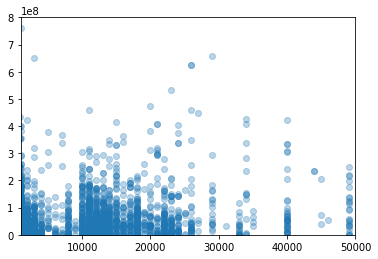

In [6]:
plt.scatter(df_US.actor_1_facebook_likes, df_US.gross, alpha = .3)
plt.xlim(1000, 50000)
plt.ylim(0, 8e8)

(0, 600000000.0)

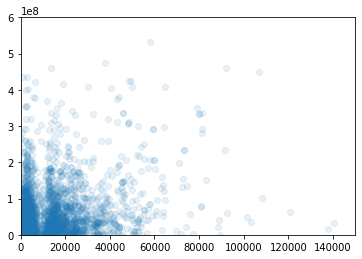

In [7]:
#TOTAL CAST FACEBOOK LIKES

plt.scatter(df_US.cast_total_facebook_likes, df_US.gross, alpha = .1)
plt.xlim(0,150000)
plt.ylim(0, 6e8)